# Importing Libraries

In [1]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


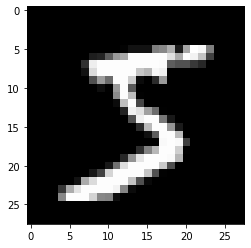

5


In [3]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

# **Data Preprocessing**

In [4]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


# **One Hot Encoding**

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# **Model Building**

In [8]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

# **Model Compilation**

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Training the model**

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 164s 87ms/step - loss: 0.3709 - accuracy: 0.9537 - val_loss: 0.0905 - val_accuracy: 0.9731
Epoch 2/3
1875/1875 [==============================] - 160s 86ms/step - loss: 0.0644 - accuracy: 0.9806 - val_loss: 0.0849 - val_accuracy: 0.9738
Epoch 3/3
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.1104 - val_accuracy: 0.9739


## Save the model

In [11]:
model.save('/content/drive/MyDrive/NHDRP/model.pth')

# **Prediction**

1/1 [==============================] - 0s 203ms/step
Prediction (Softmax) from the neural network:

 [[5.0071099e-15 5.1431282e-14 5.6818314e-16 2.3718472e-10 1.4366519e-09
  1.5966983e-14 7.5432685e-17 2.1112381e-11 8.7360959e-11 1.0000000e+00]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


--------- Prediction --------- 




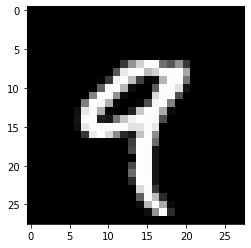



Final Output: 9


In [12]:
example = X_train[4]
prediction = model.predict(example.reshape(1, 28, 28, 1))

## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))

## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))